## Linear Operator (Inpaint)
SOLVING INVERSE PROBLEMS IN MEDICAL IMAGING WITH SCORE-BASED GENERATIVE MODELS

In [1]:
from configs.inverse.nc_ddpmpp_inpaint import get_config
config = get_config()

In [2]:
from utils import save_checkpoint, load_checkpoint, restore_checkpoint
from models import utils as mutils
from inverse.inverse_lib import get_obsvsde, _inverse_fn
from run_lib import _sample_fn

2024-07-05 20:25:41.489287: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
ckptdir = 'workdir/nc-theta/checkpoints/checkpoint_5.pth'
score_model = mutils.create_model(config)
score_model = load_checkpoint(ckptdir, score_model, config.device)

print(f"begin: {config.data.category} - {config.data.image_size}")

begin: Theta - 64


In [4]:
from torchvision.utils import make_grid, save_image
import matplotlib.pyplot as plt
import numpy as np

In [5]:
origin, observation, sample, operator = _inverse_fn(config, score_model)

nrow = int(np.sqrt(sample.shape[0]))
obsv_grid = make_grid(observation, nrow, padding=2)
image_grid = make_grid(sample, nrow, padding=2)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


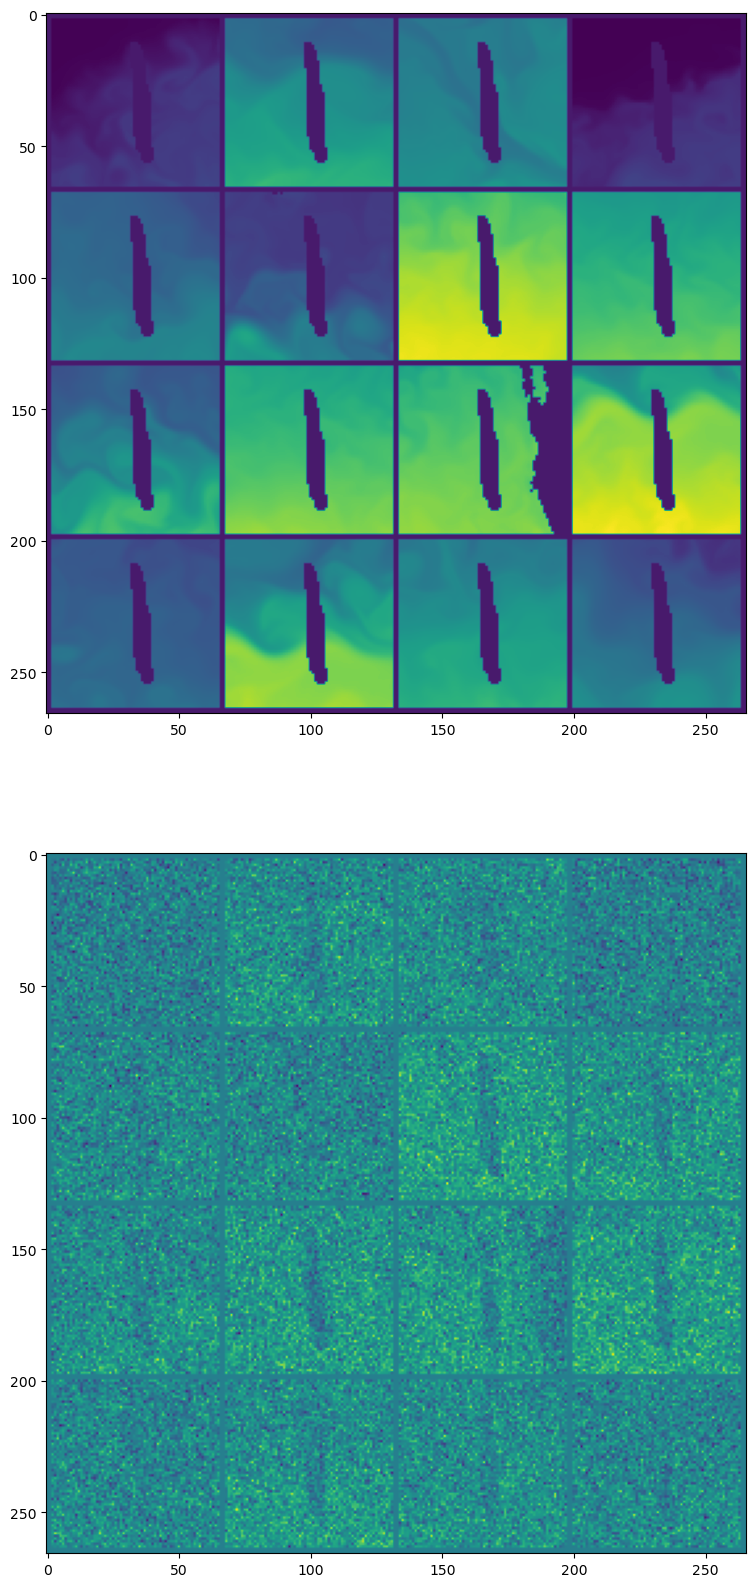

In [6]:
fig, axe = plt.subplots(nrows=2, ncols=1,figsize=(20,20))
axe[0].imshow(obsv_grid[0].cpu())
axe[1].imshow(image_grid[0].cpu())

#### Explicit Runge-Kutta method of order 5(4)

In [7]:
config.inverse.solver = 'RK45'

In [8]:
origin, observation, sample, operator =  _inverse_fn(config, score_model)

nrow = int(np.sqrt(sample.shape[0]))
obsv_grid = make_grid(observation, nrow, padding=2)
image_grid = make_grid(sample, nrow, padding=2)

542


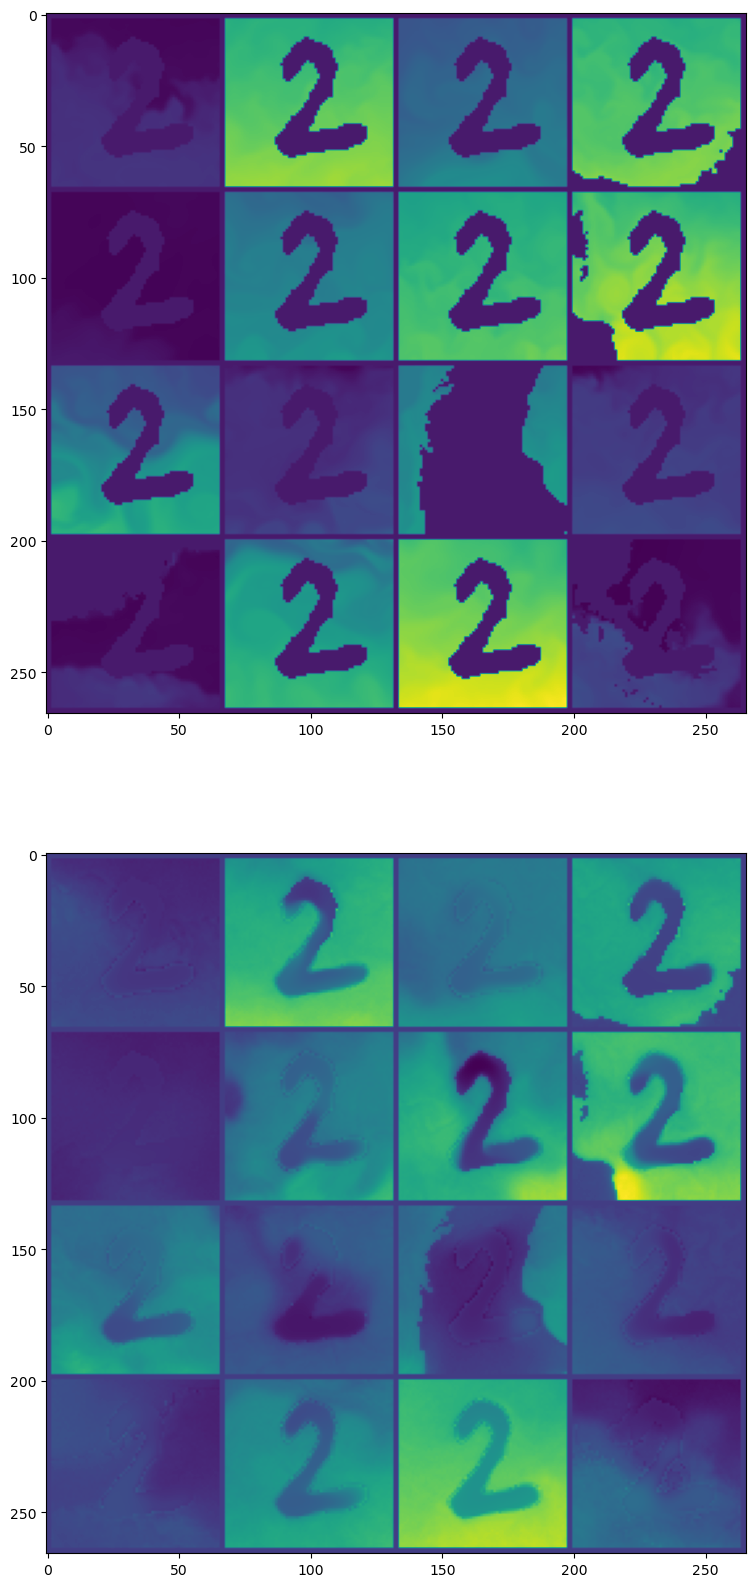

In [9]:
fig, axe = plt.subplots(nrows=2, ncols=1,figsize=(20,20))
axe[0].imshow(obsv_grid[0].cpu())
axe[1].imshow(image_grid[0].cpu())

## DPS

In [10]:
from configs.inverse.nc_ddpmpp_inpaint_dps import get_config
config = get_config()

In [11]:
ckptdir = 'workdir/nc-theta/checkpoints/checkpoint_5.pth'
score_model = mutils.create_model(config)
score_model = load_checkpoint(ckptdir, score_model, config.device)

print(f"begin: {config.data.category} - {config.data.image_size}")

begin: Theta - 64


In [12]:
origin, observation, sample, operator = _inverse_fn(config, score_model)

nrow = int(np.sqrt(sample.shape[0]))
obsv_grid = make_grid(observation, nrow, padding=2)
image_grid = make_grid(sample, nrow, padding=2)

t = 0.99265
t = 0.99123
t = 0.99049
t = 0.9902
t = 0.98847
t = 0.98544
t = 0.98235
t = 0.97924
t = 0.97522
t = 0.97059
t = 0.96661
t = 0.96223
t = 0.95852
t = 0.95531
t = 0.95135
t = 0.94619
t = 0.94133
t = 0.9358
t = 0.93071
t = 0.92613
t = 0.92114
t = 0.91574
t = 0.90866
t = 0.90316
t = 0.8973
t = 0.89197
t = 0.88757
t = 0.88349
t = 0.87834
t = 0.87268
t = 0.86741
t = 0.86243
t = 0.85789
t = 0.85256
t = 0.84816
t = 0.84443
t = 0.84078
t = 0.83784
t = 0.83507
t = 0.83199
t = 0.82944
t = 0.82686
t = 0.82399
t = 0.82157
t = 0.81926
t = 0.81702
t = 0.81485
t = 0.81261
t = 0.8103
t = 0.80841
t = 0.80592
t = 0.80304
t = 0.80043
t = 0.79682
t = 0.79221
t = 0.78736
t = 0.782
t = 0.77581
t = 0.76993
t = 0.76425
t = 0.75757
t = 0.74998
t = 0.74197
t = 0.73339
t = 0.72488
t = 0.71956
t = 0.71425
t = 0.70918
t = 0.70247
t = 0.69351
t = 0.68248
t = 0.66806
t = 0.65402
t = 0.64295
t = 0.62957
t = 0.60614
t = 0.56561
t = 0.34739
t = 0.18794
t = 0.10336
t = 0.01388
1982


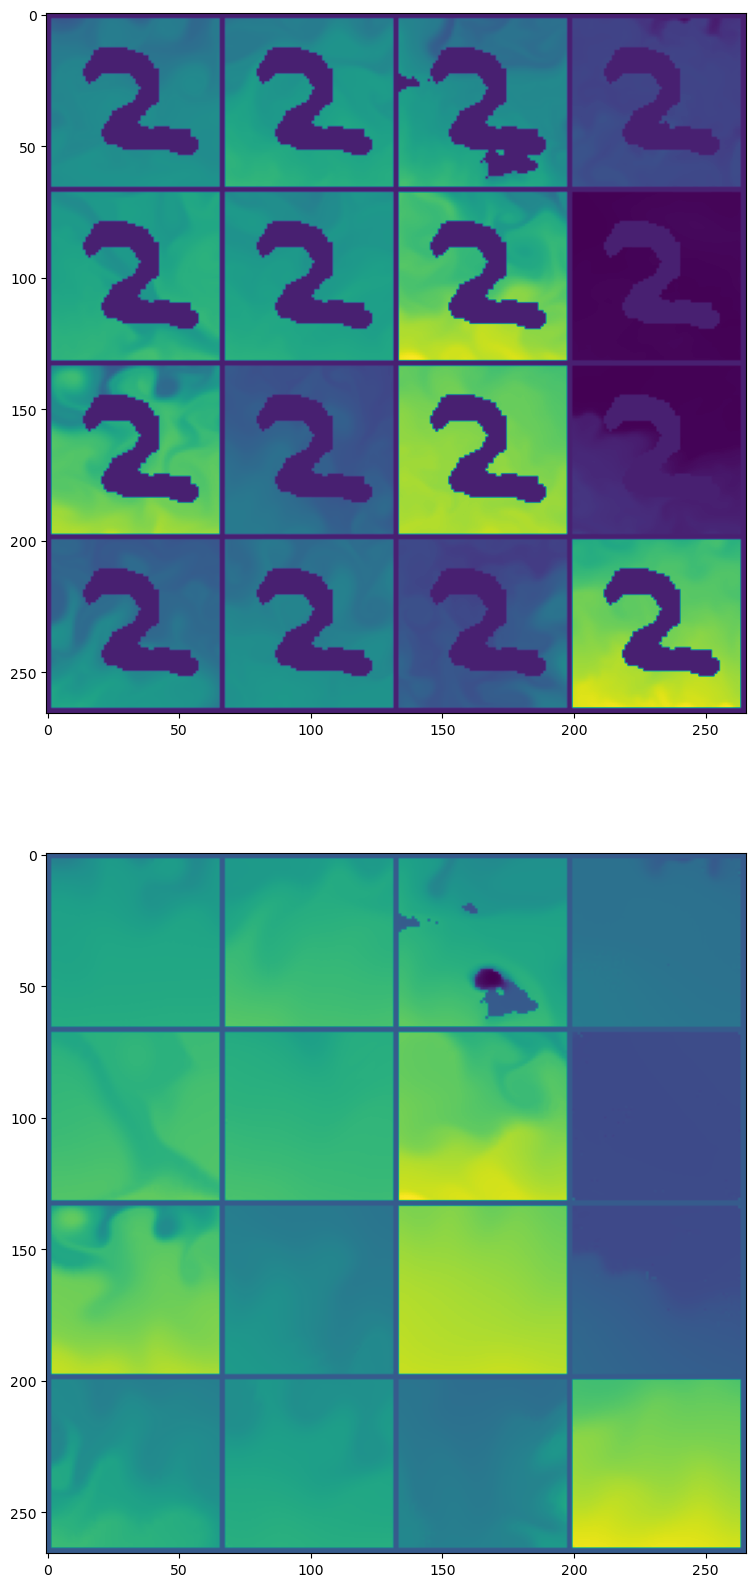

In [13]:
fig, axe = plt.subplots(nrows=2, ncols=1,figsize=(20,20))
axe[0].imshow(obsv_grid[0].cpu())
axe[1].imshow(image_grid[0].cpu())

# Experiment

In [1]:
import numpy as np
from configs.inverse.nc_ddpmpp_rndinpaint_dps import get_config
from utils import save_checkpoint, load_checkpoint, restore_checkpoint
from models import utils as mutils
from inverse.inverse_lib import get_obsvsde, _inverse_fn, evaluate_inverse
from run_lib import _sample_fn
from torchvision.utils import make_grid, save_image
import matplotlib.pyplot as plt
import numpy as np

config = get_config()
ckptdir = 'workdir/nc-theta/checkpoints/checkpoint_5.pth'
score_model = mutils.create_model(config)
score_model = load_checkpoint(ckptdir, score_model, config.device)

ratio_list = np.linspace(0.05, 0.95, 10)

/home/yz812/anaconda3/lib/python3.11/site-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
/home/yz812/anaconda3/lib/python3.11/site-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
2024-07-15 23:30:42.849736: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


t = 0.99685
t = 0.99759
t = 0.997
t = 0.99434
t = 0.99035
t = 0.98583
t = 0.98098
t = 0.97585
t = 0.97044
t = 0.96456
t = 0.95857
t = 0.95225
t = 0.94557
t = 0.93849
t = 0.93127
t = 0.92335
t = 0.91495
t = 0.90572
t = 0.89622
t = 0.8865
t = 0.87554
t = 0.86438
t = 0.85277
t = 0.84079
t = 0.82867
t = 0.81696
t = 0.80511
t = 0.79395
t = 0.78402
t = 0.77597
t = 0.76755
t = 0.75841
t = 0.74839
t = 0.73619
t = 0.71865
t = 0.69029
t = 0.65562
t = 0.58414
t = 0.2257
t = 0.05075
1454
ratio: 0.05 => mseL: 92.36202239990234


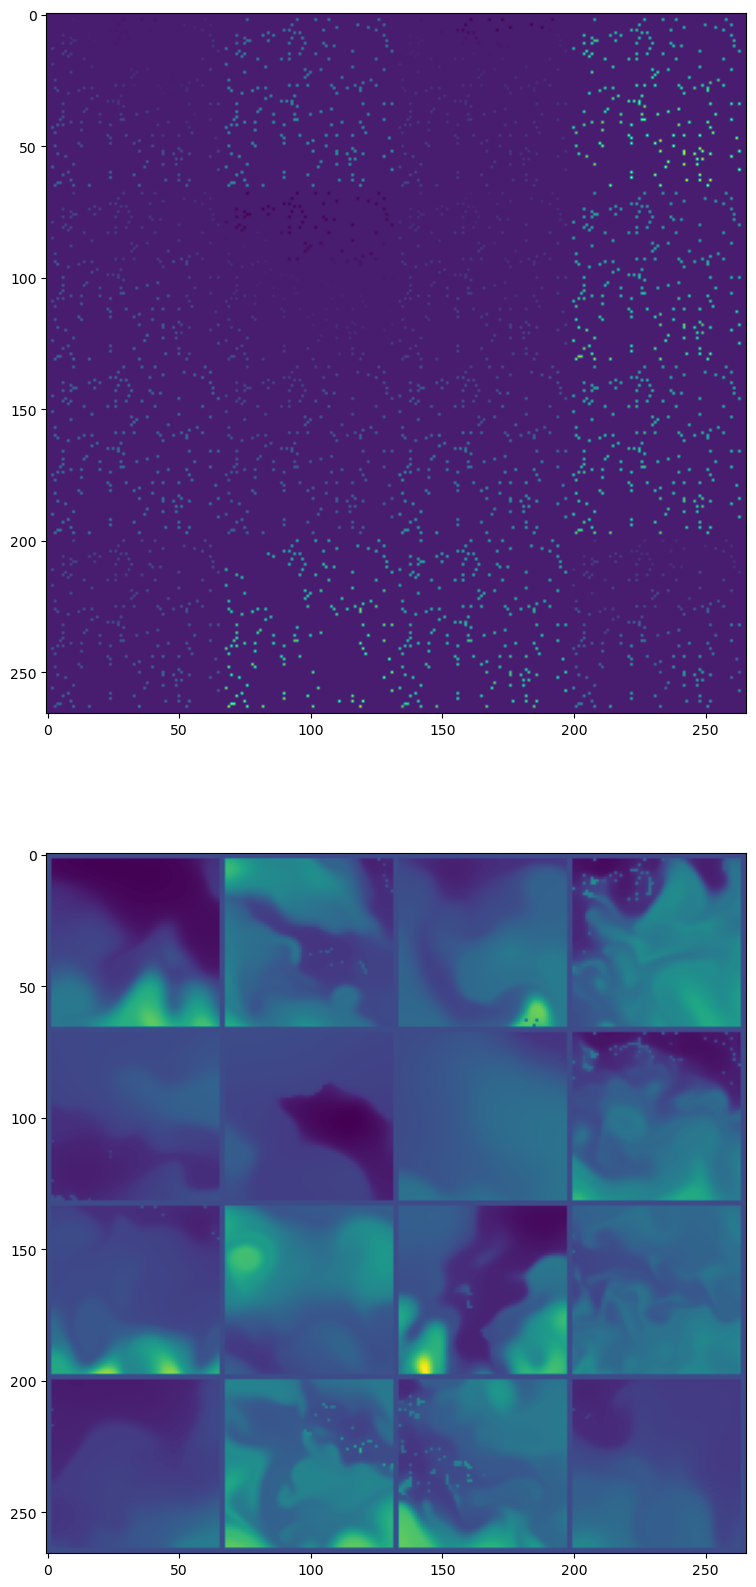

t = 0.99694
t = 0.99642
t = 0.99597
t = 0.99337
t = 0.98898
t = 0.98376
t = 0.9786
t = 0.9731
t = 0.96745
t = 0.96124
t = 0.95523
t = 0.94938
t = 0.94212
t = 0.93502
t = 0.92761
t = 0.9199
t = 0.91194
t = 0.90346
t = 0.89581
t = 0.88735
t = 0.87839
t = 0.86905
t = 0.86049
t = 0.85138
t = 0.84303
t = 0.83398
t = 0.8257
t = 0.81658
t = 0.80753
t = 0.79994
t = 0.79303
t = 0.78693
t = 0.77976
t = 0.77196
t = 0.76355
t = 0.75298
t = 0.73686
t = 0.71693
t = 0.6884
t = 0.64776
t = 0.54945
t = 0.19747
t = 0.03113
1574
ratio: 0.15 => mseL: 100.54971313476562


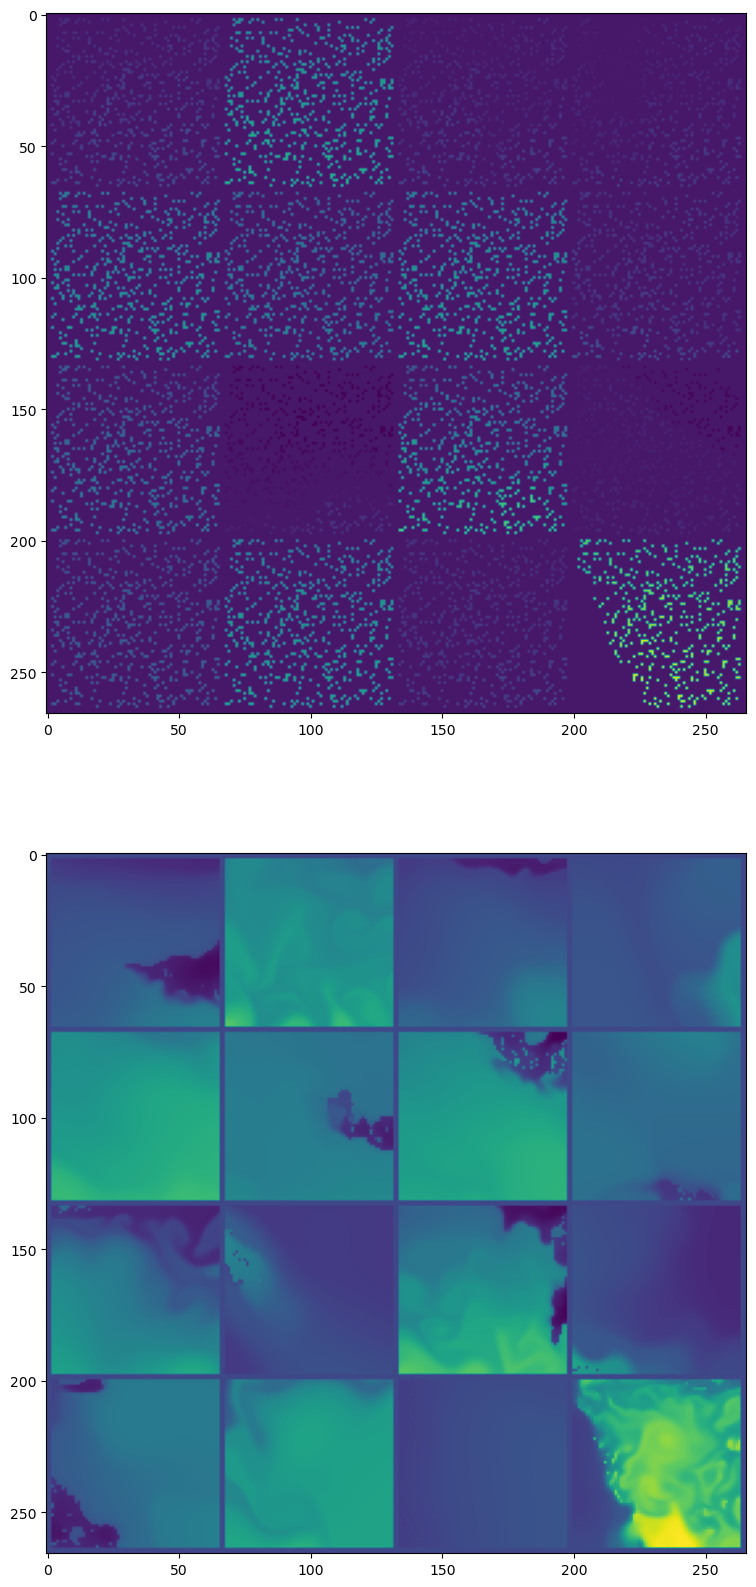

t = 0.99541
t = 0.99515
t = 0.99486
t = 0.99304
t = 0.98972
t = 0.9855
t = 0.98146
t = 0.97706
t = 0.9725
t = 0.96745
t = 0.96263
t = 0.95689
t = 0.95065
t = 0.94391
t = 0.93693
t = 0.92958
t = 0.92183
t = 0.91369
t = 0.90532
t = 0.89637
t = 0.88686
t = 0.87715
t = 0.86709
t = 0.85673
t = 0.84574
t = 0.83485
t = 0.82314
t = 0.81254
t = 0.80253
t = 0.79313
t = 0.78447
t = 0.77674
t = 0.76937
t = 0.76167
t = 0.75248
t = 0.74095
t = 0.72157
t = 0.68597
t = 0.64674
t = 0.59489
t = 0.31292
t = 0.10664
t = 0.05392
1568
ratio: 0.25 => mseL: 37.638092041015625


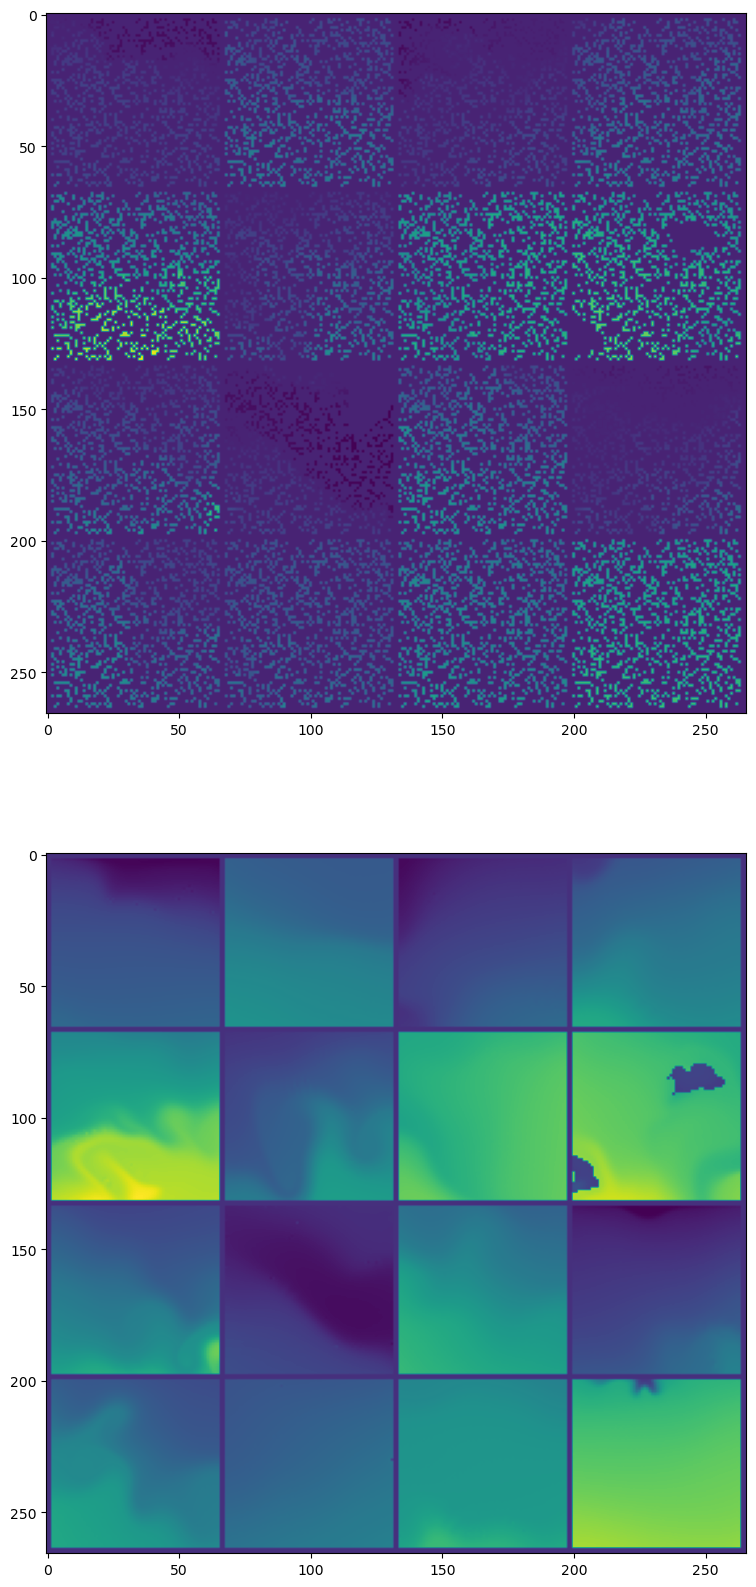

t = 0.99502
t = 0.99465
t = 0.99387
t = 0.99074
t = 0.98627
t = 0.98121
t = 0.976
t = 0.97093
t = 0.96498
t = 0.95896
t = 0.9521
t = 0.94541
t = 0.93808
t = 0.931
t = 0.9234
t = 0.9151
t = 0.90684
t = 0.89757
t = 0.88866
t = 0.87891
t = 0.86948
t = 0.85924
t = 0.84968
t = 0.83926
t = 0.83
t = 0.82044
t = 0.81187
t = 0.80348
t = 0.79609
t = 0.78866
t = 0.78179
t = 0.77377
t = 0.76462
t = 0.75341
t = 0.73862
t = 0.72066
t = 0.69415
t = 0.66661
t = 0.63369
t = 0.57391
t = 0.21641
t = 0.07532
t = 0.00413
1664
ratio: 0.35 => mseL: 101.7703628540039


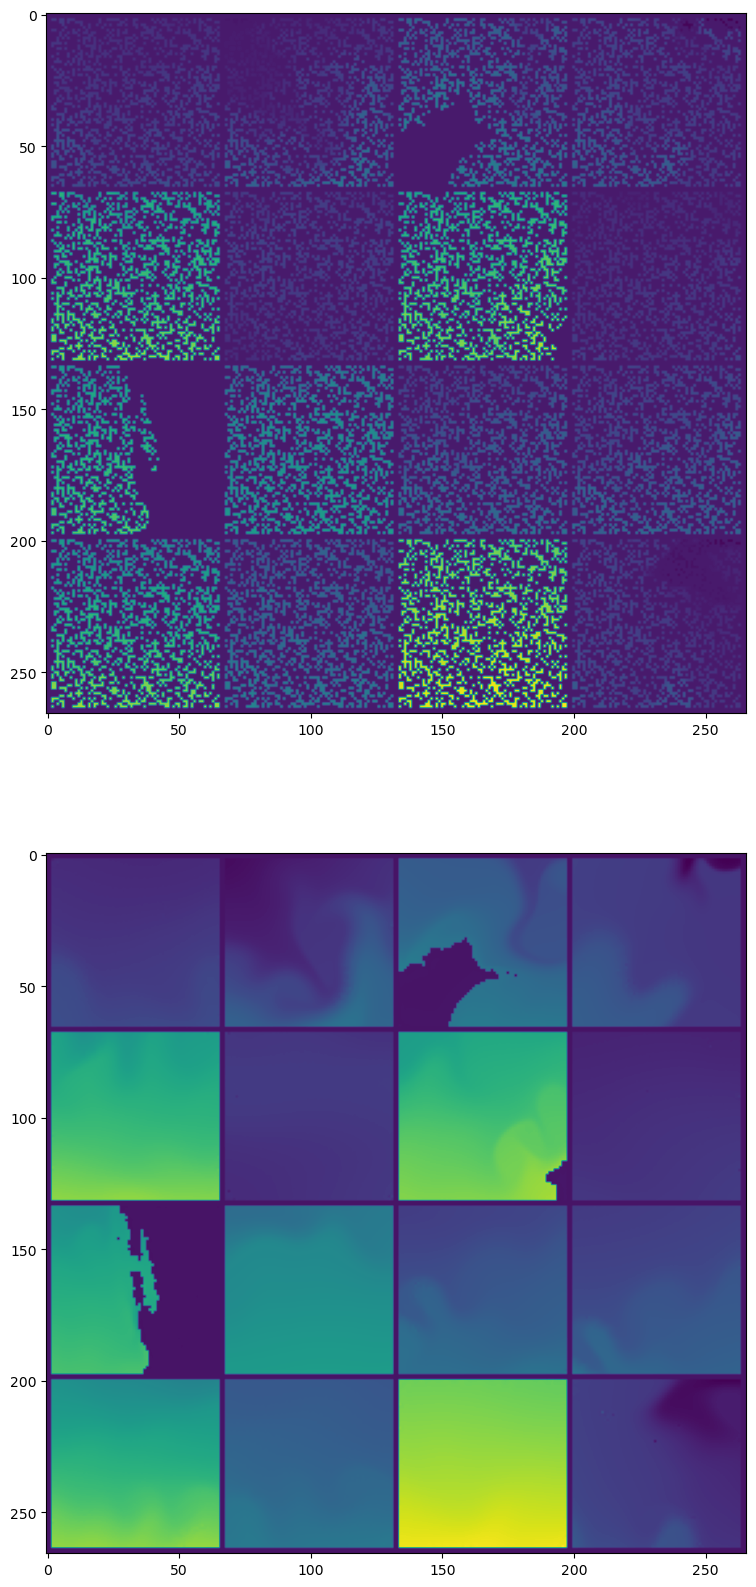

t = 0.9936
t = 0.99412
t = 0.99365
t = 0.99064
t = 0.98614
t = 0.98072
t = 0.97574
t = 0.97034
t = 0.96401
t = 0.95799
t = 0.95154
t = 0.94446
t = 0.93651
t = 0.92863
t = 0.91999
t = 0.91174
t = 0.90294
t = 0.89365
t = 0.88363
t = 0.8728
t = 0.86344
t = 0.85346
t = 0.84233
t = 0.83114
t = 0.82014
t = 0.80902
t = 0.79843
t = 0.78945
t = 0.78132
t = 0.77317
t = 0.76476
t = 0.75619
t = 0.74651
t = 0.73565
t = 0.72369
t = 0.71004
t = 0.6952
t = 0.67713
t = 0.65663
t = 0.6315
t = 0.55732
t = 0.23059
t = 0.10125
t = 0.001
1628
ratio: 0.44999999999999996 => mseL: 99.89299774169922


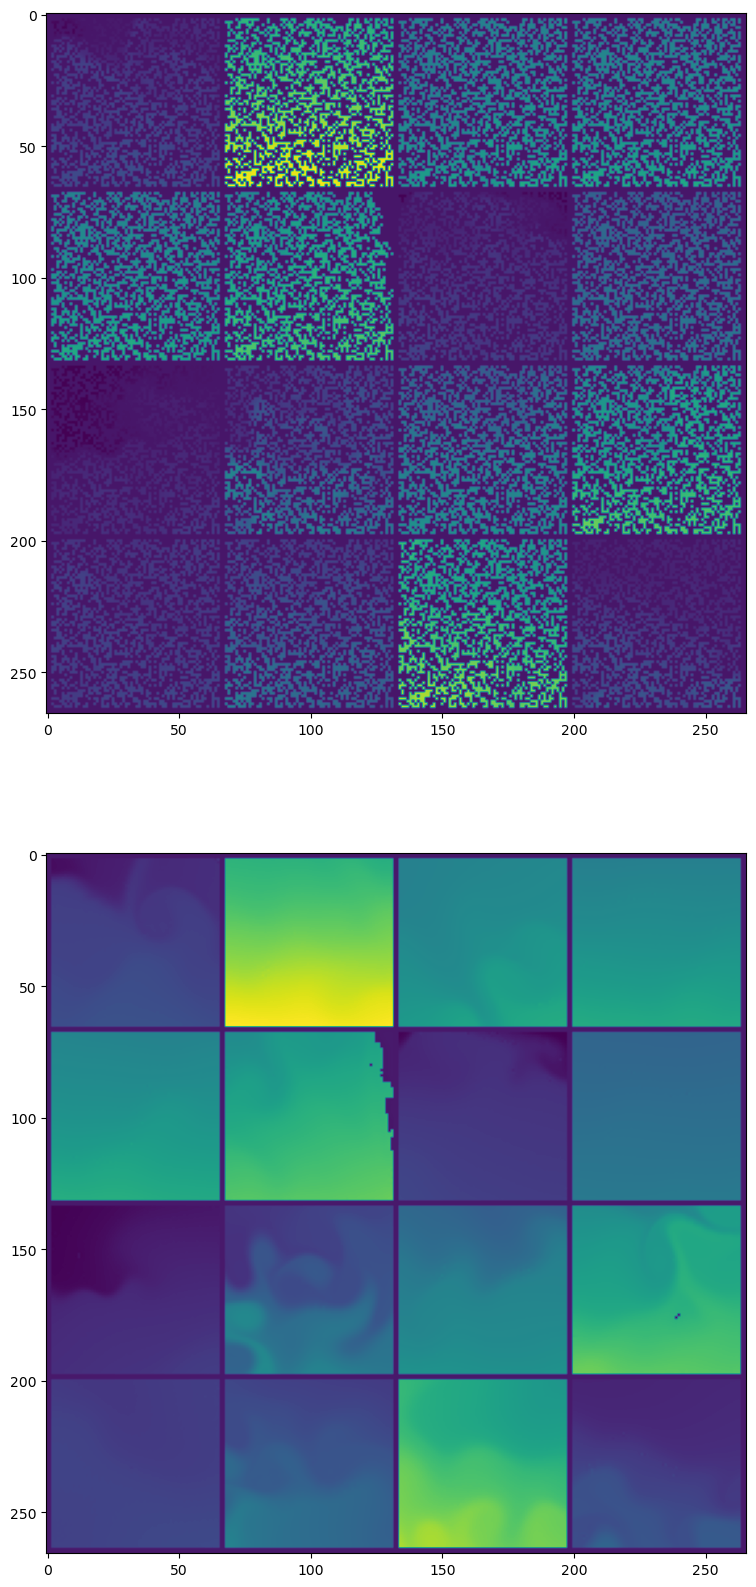

t = 0.99352
t = 0.99353
t = 0.99288
t = 0.99153
t = 0.98793
t = 0.98339
t = 0.97897
t = 0.97347
t = 0.96811
t = 0.96237
t = 0.95678
t = 0.95047
t = 0.94362
t = 0.93655
t = 0.92914
t = 0.92073
t = 0.91258
t = 0.90391
t = 0.89497
t = 0.8855
t = 0.87585
t = 0.86585
t = 0.85531
t = 0.84486
t = 0.83428
t = 0.82295
t = 0.81294
t = 0.80474
t = 0.79693
t = 0.79
t = 0.78337
t = 0.77661
t = 0.76966
t = 0.76327
t = 0.75584
t = 0.74807
t = 0.73976
t = 0.73063
t = 0.72042
t = 0.70915
t = 0.69578
t = 0.68072
t = 0.6625
t = 0.64113
t = 0.61017
t = 0.50309
t = 0.21459
t = 0.08937
1748
ratio: 0.5499999999999999 => mseL: 111.81161499023438


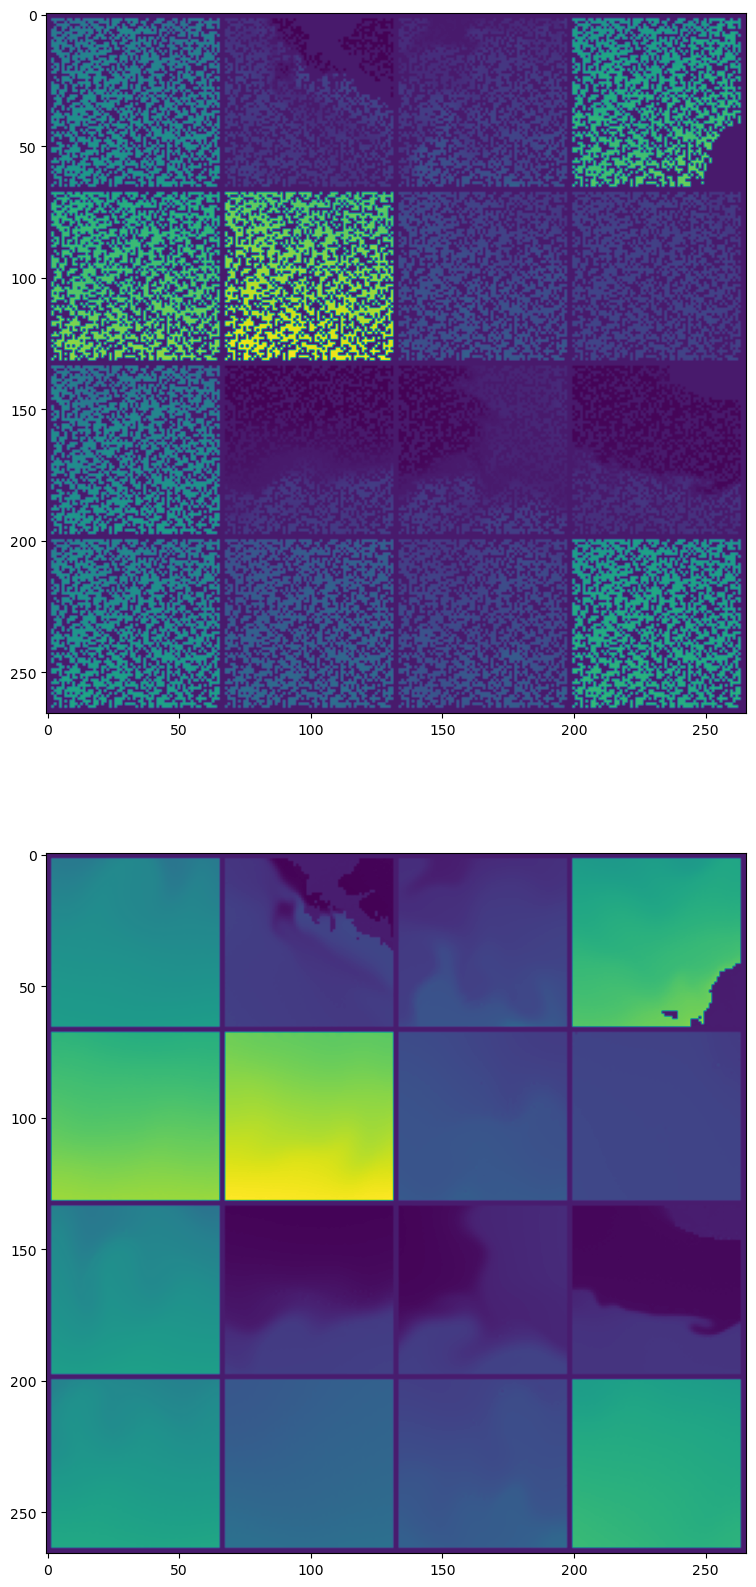

t = 0.99296
t = 0.99274
t = 0.98996
t = 0.98598
t = 0.98199
t = 0.97714
t = 0.97214
t = 0.96684
t = 0.96123
t = 0.95536
t = 0.94904


KeyboardInterrupt: 

In [2]:
loss = []

for ratio in ratio_list:
    config.inverse.ratio = ratio

    origin, observation, sample, operator = _inverse_fn(config, score_model)

    mse = evaluate_inverse(config, origin, observation, operator)
    print(f"ratio: {ratio} => mse: {mse}")
    loss.append(mse)

    nrow = int(np.sqrt(sample.shape[0]))
    obsv_grid = make_grid(observation, nrow, padding=2)
    image_grid = make_grid(sample, nrow, padding=2)

    fig, axe = plt.subplots(nrows=2, ncols=1,figsize=(20,20))
    axe[0].imshow(obsv_grid[0].cpu())
    axe[1].imshow(image_grid[0].cpu())
    plt.show()

print(mse)